### Imports 🛂

In [1]:
# Add root project folder to path
import sys
sys.path.append('../')

# Dependencies
import numpy as np
from datetime import datetime
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline

# Components
from unet.dataset import ShapesDataset
from unet.unet import UNet

### Define some of the training parameters 🏋

In [4]:
EVAL_NUM_EXAMPLES = 10
IMAGE_WIDTH, IMAGE_HEIGHT, NUM_CHANNELS = 256, 256, 3
NUM_EPOCHS = 1
BATCH_SIZE = 1
WEIGHTS = "../weights/tf_unet_toy_network"

### Create the synthetic evaluation dataset 🧪
Dataset module thanks to [Mask-RCNN](https://github.com/matterport/Mask_RCNN/blob/master/samples/shapes/train_shapes.ipynb) by Matterport

In [5]:
dataset_eval = ShapesDataset()
dataset_eval.load_shapes(EVAL_NUM_EXAMPLES, IMAGE_HEIGHT, IMAGE_WIDTH)
dataset_eval.prepare()

### Organize the dataset into two numpy arrays ✈ 
And treshold the segmentation masks to get an alpha image

In [6]:
image = [dataset_eval.load_image(image_id).astype(
    np.float32) / 255 for image_id in dataset_eval.image_ids]
masks = []
for image_id in dataset_eval.image_ids:
    mask, classes = dataset_eval.load_mask(image_id)

    # Treshold the segmentation images to get b&w alpha mask
    mask_treshold = np.expand_dims(
        np.where(mask[:, :, 0] > 0, 255, 0).astype(np.float16),
        axis=3) / 255
    masks.append(mask_treshold)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: DeprecationWarning: Both axis > a.ndim and axis < -a.ndim - 1 are deprecated and will raise an AxisError in the future.
  # Remove the CWD from sys.path while we load stuff.


### Plot a sample from the dataset 📊

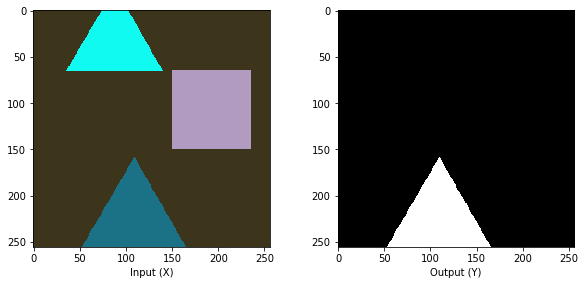

In [10]:
fig=plt.figure(figsize=(20, 20))

random_selector = np.random.randint(len(dataset_eval.image_ids))

fig.add_subplot(4, 1, 1)
plt.imshow(image[random_selector])
plt.xlabel("Input (X)")

fig.add_subplot(4, 2, 2)
plt.imshow(masks[random_selector][:,:,0].astype(np.uint8), cmap='gray')
plt.xlabel("Output (Y)")

plt.show()

### Create the U-network model instance and print the summary

In [14]:
unet = UNet()
unet.compile(optimizer="adam",
             loss="binary_crossentropy",
             metrics=["accuracy"])
unet.build((None, IMAGE_HEIGHT, IMAGE_WIDTH, NUM_CHANNELS))
unet.load_weights(WEIGHTS)

### Evaluate the U-network

In [16]:
loss, acc = unet.evaluate(np.array(image), np.array(masks))

10/1 [============================================================================================================================================================================================================================================================================================================] - 10s 1s/sample - loss: 0.3711 - accuracy: 0.9089


In [17]:
print("Restored model and ran evaluation, accuracy: {:5.2f}%".format(100*acc))

Restored model and ran evaluation, accuracy: 90.89%
